<a href="https://colab.research.google.com/github/JohnFarlander/ML_Practicals/blob/main/BML_Exp11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


✅ Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

✅ Accuracy: 60.0 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro

/tmp/ipython-input-3924019583.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


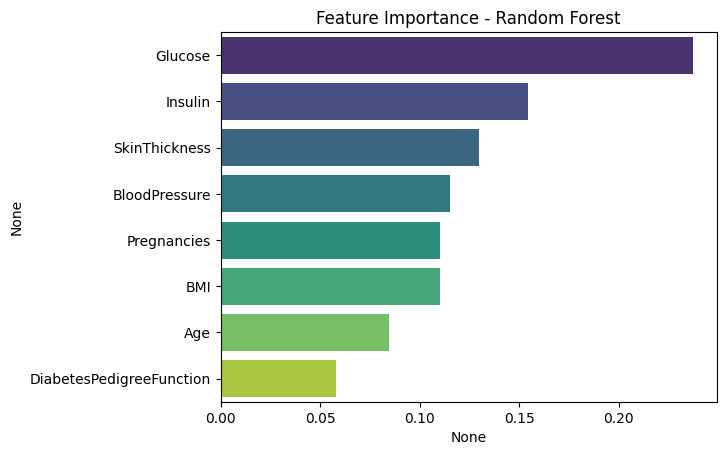

In [5]:
# ==========================================
# RANDOM FOREST - MANUAL DATASET VERSION
# ==========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create dataset manually
data = [
    [6,148,72,35,0,33.6,0.627,50,1],
    [1,85,66,29,0,26.6,0.351,31,0],
    [8,183,64,0,0,23.3,0.672,32,1],
    [1,89,66,23,94,28.1,0.167,21,0],
    [0,137,40,35,168,43.1,2.288,33,1],
    [5,116,74,0,0,25.6,0.201,30,0],
    [3,78,50,32,88,31.0,0.248,26,1],
    [10,115,0,0,0,35.3,0.134,29,0],
    [2,197,70,45,543,30.5,0.158,53,1],
    [8,125,96,0,0,0.0,0.232,54,1],
    [4,110,92,0,0,37.6,0.191,30,0],
    [10,168,74,0,0,38.0,0.537,34,1],
    [10,139,80,0,0,27.1,1.441,57,0],
    [1,189,60,23,846,30.1,0.398,59,1],
    [5,166,72,19,175,25.8,0.587,51,1]
]

# Step 2: Define columns
cols = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Step 3: Create DataFrame
df = pd.DataFrame(data, columns=cols)

print("✅ Dataset Loaded Successfully")
print(df.head())

# Step 4: Split data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Results
print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n🌿 Feature Importance:\n", feat_imp)

# Step 9: Plot Feature Importance
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()
